# ASSIGNMENT NO 12
PS 12
Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. 
Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding = 'latin-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
#preprocess

df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
df.shape

(2823, 25)

In [5]:
df.drop(['ADDRESSLINE1',"ADDRESSLINE2","STATE","TERRITORY", "CONTACTFIRSTNAME", "CONTACTLASTNAME", "QTR_ID", "CUSTOMERNAME"], axis = 1,inplace = True)

In [6]:
df.drop(['PHONE', 'YEAR_ID', 'ORDERDATE'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   STATUS           2823 non-null   object 
 6   MONTH_ID         2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  POSTALCODE       2747 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 308.9+ KB


In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,7.092455,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,3.656633,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,4.000000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,8.000000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,11.000000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,12.000000,214.000000


In [8]:
df.drop('ORDERNUMBER', inplace = True, axis = 1)

In [9]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,7.092455,100.715551
std,9.741443,20.174277,4.225841,1841.865106,3.656633,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,4.000000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,8.000000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,11.000000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,12.000000,214.000000


In [10]:
df.shape

(2823, 13)

In [11]:
cat_list = df.select_dtypes(include=object).columns.to_list()

In [12]:
cat_list

['STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CITY',
 'POSTALCODE',
 'COUNTRY',
 'DEALSIZE']

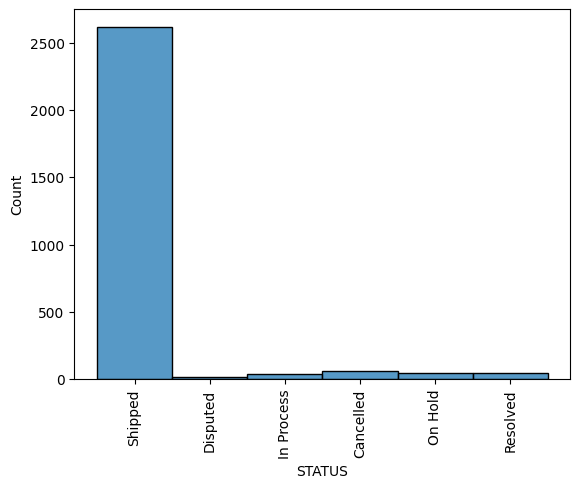

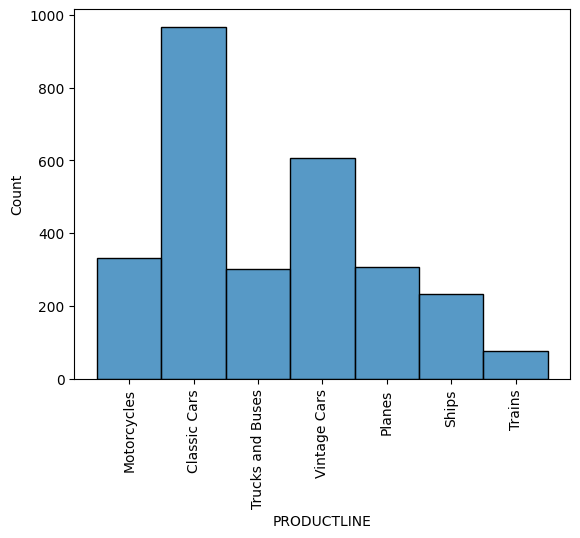

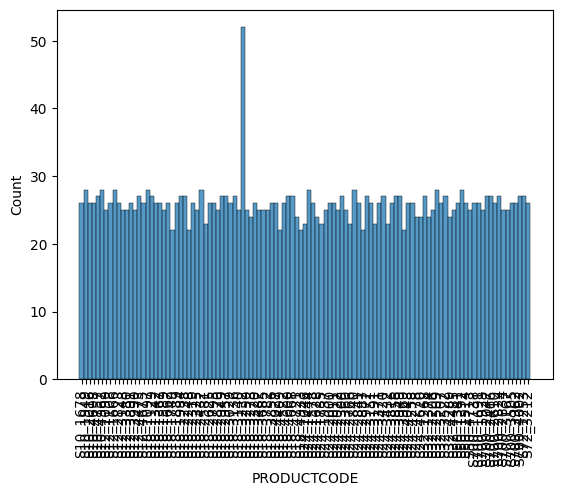

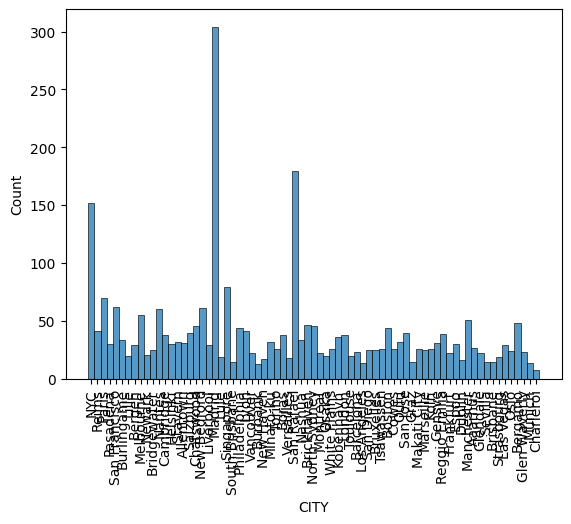

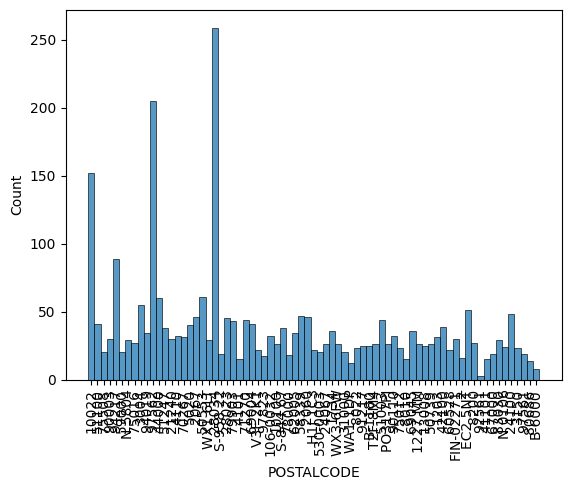

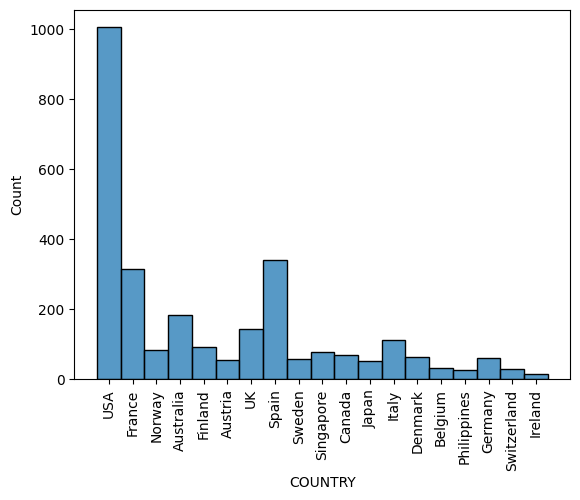

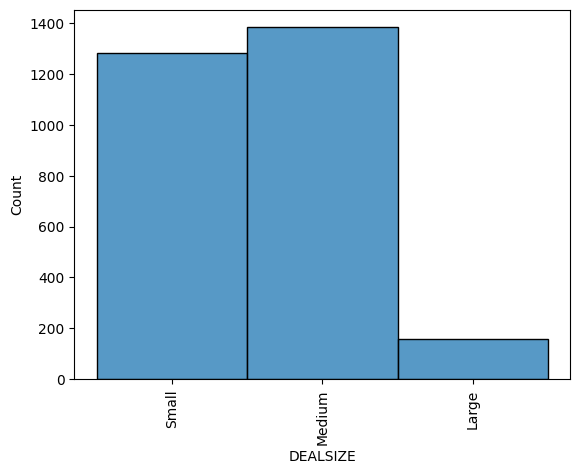

In [13]:
for i in cat_list:
  sns.histplot(data = df ,x = i)
  plt.xticks(rotation = 90)
  plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df[cat_list].nunique()

STATUS           6
PRODUCTLINE      7
PRODUCTCODE    109
CITY            73
POSTALCODE      73
COUNTRY         19
DEALSIZE         3
dtype: int64

In [16]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   int32  
 5   MONTH_ID         2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   int32  
 7   MSRP             2823 non-null   int64  
 8   PRODUCTCODE      2823 non-null   int32  
 9   CITY             2823 non-null   int32  
 10  POSTALCODE       2823 non-null   int32  
 11  COUNTRY          2823 non-null   int32  
 12  DEALSIZE         2823 non-null   int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 209.6 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
STATUS,2823.0,4.782501,0.879416,0.00,5.00,5.0,5.0,5.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
PRODUCTLINE,2823.0,2.515055,2.411665,0.00,0.00,2.0,5.0,6.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0
PRODUCTCODE,2823.0,53.773291,31.585298,0.00,27.00,53.0,81.0,108.0
CITY,2823.0,38.094226,19.446076,0.00,24.50,38.0,55.0,72.0


<AxesSubplot:xlabel='SALES', ylabel='Count'>

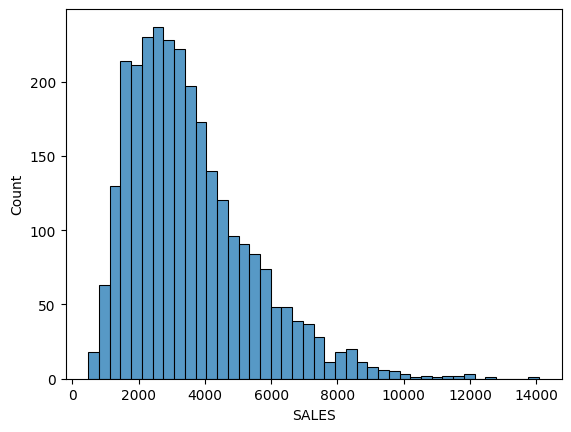

In [19]:
## target feature are Sales and productCode
X = df[['SALES','PRODUCTCODE']]
sns.histplot(df['SALES'])

In [20]:
X.head()

,SALES,PRODUCTCODE
0,2871.00,0
1,2765.90,0
2,3884.34,0
3,3746.70,0
4,5205.27,0


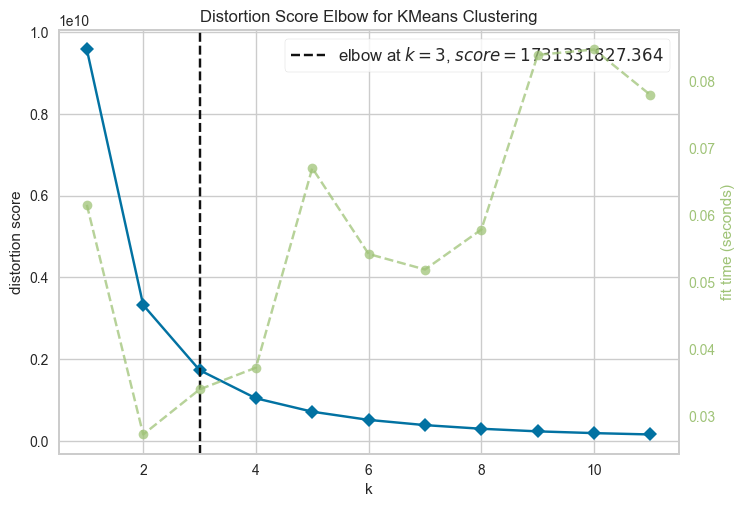

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

visualizer = KElbowVisualizer(KMeans(), k = (1,12)).fit(X)
visualizer.show()

In [22]:
kmeans_model = KMeans(n_clusters = 3, init = "k-means++").fit(X)

In [23]:
kmeans_model.labels_

array([2, 2, 0, ..., 0, 2, 2])

In [24]:
kmeans_model.cluster_centers_

array([[4140.05519373,   50.4197417 ],
       [7099.92341398,   31.52419355],
       [2124.09474031,   62.48719824]])

In [25]:
from collections import Counter
Counter(kmeans_model.labels_)

Counter({2: 1367, 0: 1083, 1: 373})

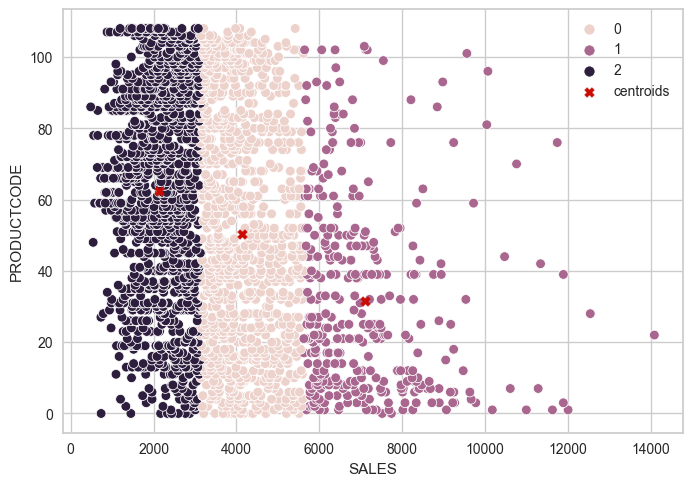

In [26]:
sns.scatterplot(data = X, x = 'SALES', y = 'PRODUCTCODE',hue = kmeans_model.labels_)
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],c = "r", label = "centroids", marker = "X")
plt.legend()
plt.show()